# Exp 2: Implementation of an End-to-End Machine Learning Data Pipeline.

## Name: Agastya Shetty
## Roll No : 63
## Batch : 3

In [45]:
!pip install numpy

In [2]:
!pip install pandas

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 8.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.9 MB 4.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 4.4 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.9 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 4.2 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.9 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.9 MB 4.1 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 4.1 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 4.0 MB/s  0:00:02


In [3]:
!pip install matplotlib

In [4]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 3.9 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 4.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.9 MB/s  0:00:02
   ---------------------------------------- 0.0/37.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/37.1 MB 4.2 MB/s eta 0:00:09
   - ----------------------

In [5]:
!pip install seaborn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
import seaborn as sns
titanic_data=sns.load_dataset('titanic')

In [9]:
print (titanic_data.shape)

(891, 15)


In [10]:
print (titanic_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='str')


In [11]:
print (titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [12]:
print (titanic_data.tail())

     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  


In [13]:
print (titanic_data.info())

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB
None


In [14]:
print (titanic_data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [15]:
missing_values=titanic_data.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [16]:
new_titanic_df=titanic_data.drop(columns=['deck'])

In [17]:
new_titanic_df['age'].fillna(new_titanic_df['age'].median(), inplace=True)

C:\Users\Agastya Shetty\AppData\Local\Temp\ipykernel_24652\3025612607.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  new_titanic_df['age'].fillna(new_titanic_df['age'].median(), inplace=True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [18]:
missing_values=new_titanic_df.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64


In [19]:
data=new_titanic_df
data['embark_town'].dtype

<StringDtype(storage='python', na_value=nan)>

In [20]:
data['embark_town'].unique()

<StringArray>
['Southampton', 'Cherbourg', 'Queenstown', nan]
Length: 4, dtype: str

In [21]:
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)

C:\Users\Agastya Shetty\AppData\Local\Temp\ipykernel_24652\2719678445.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)


0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: str

In [22]:
missing_values=data.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64


In [23]:
fd=data
fd['embarked'].dtype

<StringDtype(storage='python', na_value=nan)>

In [24]:
fd['embarked'].unique()

<StringArray>
['S', 'C', 'Q', nan]
Length: 4, dtype: str

In [25]:
fd['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

C:\Users\Agastya Shetty\AppData\Local\Temp\ipykernel_24652\2655440061.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  fd['embarked'].fillna(data['embarked'].mode()[0], inplace=True)


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: str

In [26]:
missing_values=fd.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64


In [27]:
# Outlier detection - 'Age'
mean_age = np.mean(fd['age']) # calculates the mean
std_dev_age = np.std(fd['age']) # calculates the standard deviation
Z_scores_age = (fd['age'] - mean_age) / std_dev_age # computes the Z-scores
outliers_age = fd['age'][np.abs(Z_scores_age) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("Outliers in 'Age' using Z-score: \n", outliers_age)

# Outlier detection - 'Fare'
mean_fare = np.mean(fd['fare']) # calculates the mean
std_dev_fare = np.std(fd['fare']) # calculates the standard deviation
Z_scores_fare = (fd['fare'] - mean_fare) / std_dev_fare # computes the Z-scores
outliers_fare = fd['fare'][np.abs(Z_scores_fare) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("\nOutliers in 'Fare' using Z-score: \n", outliers_fare)

Outliers in 'Age' using Z-score: 
 630    80.0
851    74.0
Name: age, dtype: float64

Outliers in 'Fare' using Z-score: 
 27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: fare, dtype: float64


In [28]:
# Drop rows with missing 'age' values
fd = fd.dropna(subset=['age'])

# Calculate the upper bound for 'age'
Q1 = fd['age'].quantile(0.25)
Q3 = fd['age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers for 'age'
fd['age'] = np.where(fd['age'] > upper_bound, upper_bound, fd['age'])

# Calculate the upper bound for 'fare'
Q1 = fd['fare'].quantile(0.25)
Q3 = fd['fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers for 'fare'
fd['fare'] = np.where(fd['fare'] > upper_bound, upper_bound, fd['fare'])

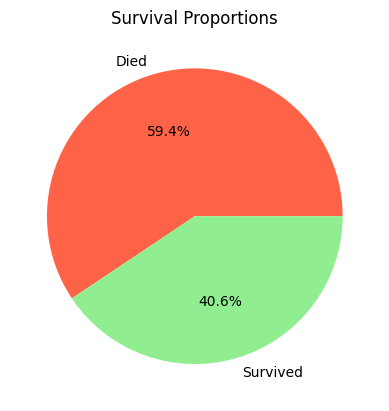

In [29]:
# Using 'survived' instead
counts = fd['survived'].value_counts()

plt.pie(counts, labels=['Died', 'Survived'], autopct='%1.1f%%', colors=['tomato', 'lightgreen'])
plt.title('Survival Proportions')
plt.show()

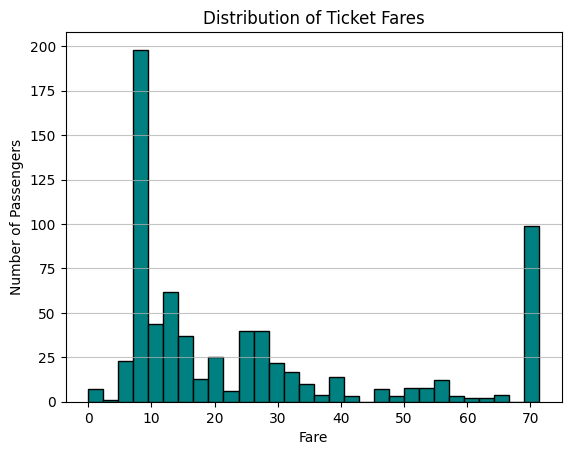

In [30]:
# Plotting the 'fare' column
plt.hist(fd['fare'], bins=30, color='teal', edgecolor='black')

plt.title('Distribution of Ticket Fares')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', alpha=0.75)

plt.show()

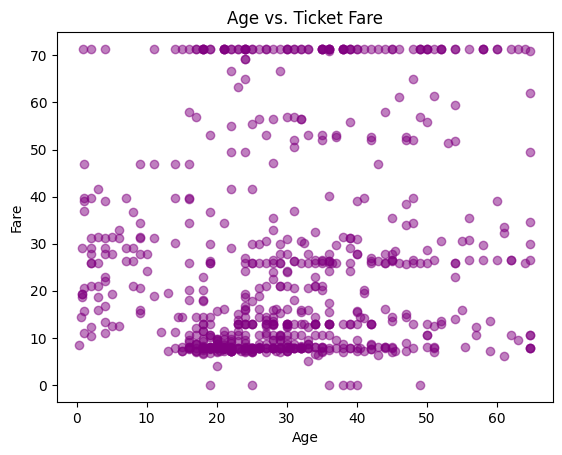

In [31]:
plt.scatter(fd['age'], fd['fare'], alpha=0.5, c='purple')

plt.title('Age vs. Ticket Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [32]:
le=LabelEncoder()
fd['sex']=le.fit_transform(fd['sex'])
fd['embarked']=le.fit_transform(fd['embarked'])

In [33]:
fd.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True


In [34]:
fd=fd[['pclass','sex','age','fare','embarked','survived']]
x=fd[['pclass','sex','age','fare','embarked',]]
y=fd['survived']

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
fd.head()

,pclass,sex,age,fare,embarked,survived
0,3,1,22.0,7.2500,2,0
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,1
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0


In [37]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [38]:
y_pred=model.predict(x_test)

In [39]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7534883720930232


In [40]:
new_passenger=pd.DataFrame({
    'pclass':[3],
    'sex':['male'],
    'age':[28],
    'fare':[7.25],
    'embarked':['S']
})

In [41]:
new_passenger_encoded=pd.get_dummies(new_passenger)
new_passenger_encoded=new_passenger_encoded.reindex(columns=x.columns,fill_value=0)

In [42]:
prediction=model.predict(new_passenger_encoded)
print(f"Survived" if prediction[0]==1 else "Not Survived")

Survived


In [43]:
new_passenger=pd.DataFrame({
    'pclass':[1,2,3],
    'sex':['female','male','female'],
    'age':[38,45,14],
    'fare':[80.0,8.05,20.0],
    'embarked':['C','S','Q']
})

new_passenger_encoded=pd.get_dummies(new_passenger)
new_passenger_encoded=new_passenger_encoded.reindex(columns=x.columns,fill_value=0)

In [44]:
prediction=model.predict(new_passenger_encoded)
for i,pred in enumerate(prediction):
    print(f"Survived {i+1}:", "Survived" if pred==1 else "Not Survived")

Survived 1: Survived
Survived 2: Survived
Survived 3: Survived
